In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import os
import json
import string
import numpy as np
import pandas as pd
#from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

!pip install gensim
!pip install lightgbm

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords  # stop words are, is, the etc. which are not needed for model
from nltk.stem.porter import PorterStemmer
from gensim.models import word2vec
from sklearn.manifold import TSNE

%matplotlib inline

from plotly import tools  # to install $ pip install plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, preprocessing, metrics, ensemble, naive_bayes, linear_model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import lightgbm as lgb # to install $ pip install lightgbm
from PIL import Image

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm *.*
!ls

drive  sample_data


In [ ]:
!wget https://raw.githubusercontent.com/manojknit/PySpark_Python-ML-Models/master/dataset/fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv

--2024-04-20 05:15:02--  https://raw.githubusercontent.com/manojknit/PySpark_Python-ML-Models/master/dataset/fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13574989 (13M) [text/plain]
Saving to: ‘fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv’

fake_real_dataset_s 100%[===================>]  12.95M  --.-KB/s    in 0.09s   

2024-04-20 05:15:02 (150 MB/s) - ‘fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv’ saved [13574989/13574989]



In [25]:
from io import BytesIO
df = pd.read_csv('/content/fake_real_dataset_spam_category_clickbait_toxicity_politafln_sentiment_stance.csv')

In [26]:
print(df.shape)
df.head()

(3709, 32)


Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1  \
0             0           0             0   
1             1           1             1   
2             2           2             2   
3             3           3             3   
4             4           4             4   

                                       uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \r\nFox News Sunday reported this ...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   

                         crawled             site_url country  domain_rank  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US        88465   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US        88465   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US        88465   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US        88465   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US        88465   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...       0.865   

                                        main_img_url  replies_count  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
3  http://100percentfedup.com/wp-content/uploads/...              0   
4  http://100percentfedup.com/wp-content/uploads/...              0   

   participants_count  likes  comments  shares  type  \
0                   1      0         0       0  bias   
1                   1      0         0       0  bias   
2                   1      0         0       0  bias   
3                   0      0         0       0  bias   
4                   0      0         0       0  bias   

                                             content  spam_score_fector  \
0  print they pay back money plus interest the en...           0.993337   
1  why did attorney general loretta lynch plead t...           0.824470   
2  red state fox news sunday reported morning ant...           0.998415   
3  email kayla mueller prisoner tortured isis cha...           0.982233   
4  email healthcare reform to make america great ...           0.976653   

  category_factor  fake  click_bait_score  toxicity_factor  src_url_polarity  \
0        business     0          0.999951                0               1.0   
1        business     0      

In [27]:
df.head()

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1  \
0             0           0             0   
1             1           1             1   
2             2           2             2   
3             3           3             3   
4             4           4             4   

                                       uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author                      published  \
0     Barracuda Brigade  2016-10-26T21:41:00.000+03:00   
1  reasoning with facts  2016-10-29T08:47:11.259+03:00   
2     Barracuda Brigade  2016-10-31T01:41:49.479+02:00   
3                Fed Up  2016-11-01T05:22:00.000+02:00   
4                Fed Up  2016-11-01T21:56:00.000+02:00   

                                               title  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...   
1  Re: Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING: Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  Print They should pay all the back all the mon...  english   
1  Why Did Attorney General Loretta Lynch Plead T...  english   
2  Red State : \r\nFox News Sunday reported this ...  english   
3  Email Kayla Mueller was a prisoner and torture...  english   
4  Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...  english   

                         crawled             site_url country  domain_rank  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US        88465   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US        88465   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US        88465   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US        88465   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US        88465   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...       0.865   

                                        main_img_url  replies_count  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
3  http://100percentfedup.com/wp-content/uploads/...              0   
4  http://100percentfedup.com/wp-content/uploads/...              0   

   participants_count  likes  comments  shares  type  \
0                   1      0         0       0  bias   
1                   1      0         0       0  bias   
2                   1      0         0       0  bias   
3                   0      0         0       0  bias   
4                   0      0         0       0  bias   

                                             content  spam_score_fector  \
0  print they pay back money plus interest the en...           0.993337   
1  why did attorney general loretta lynch plead t...           0.824470   
2  red state fox news sunday reported morning ant...           0.998415   
3  email kayla mueller prisoner tortured isis cha...           0.982233   
4  email healthcare reform to make america great ...           0.976653   

  category_factor  fake  click_bait_score  toxicity_factor  src_url_polarity  \
0        business     0          0.999951                0               1.0   
1        business     0      

In [28]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
configure_plotly_browser_state()

In [29]:
import math
def title_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[0]) == float or type(tuple1[0]) == int):
        if(math.isnan(tuple1[0])):
            tuple1[0] = ''

    if(pd.notna(tuple1[0])):
        if(tuple1[0].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])


def text_column(tuple1):
    #print(tuple1[2])
    if(type(tuple1[1]) == float or type(tuple1[1]) == int):
        if(math.isnan(tuple1[1])):
            tuple1[1] = ''

    if(pd.notna(tuple1[1])):
        if(tuple1[1].strip(' \t\n\r') == ''):
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[0])
        else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])
    else:
            return re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", tuple1[1])

df['title'] = df[['title', 'text']].apply(title_column, axis=1)
df['text'] = df[['title', 'text' ]].apply(text_column, axis=1)

In [30]:
nltk.download('punkt')
from nltk import word_tokenize
import pdb
def CleaningText(txt):
    review = re.sub('[^a-zA-Z]', ' ', txt) # Cleans all except characters
    #print("lin1")
    review = review.lower()
    #print("lin2")
    review = review.split()
    #print("lin3")
    ps = PorterStemmer()
    #print("lin4")
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    #print("lin5")
    review = ' '.join(review)
    #print("lin6")
    return review

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [31]:
temp_published = df['published'].apply(lambda x: x[slice(10)])
df['published']=pd.to_datetime(temp_published,format="%Y-%M-%d")


<Axes: >

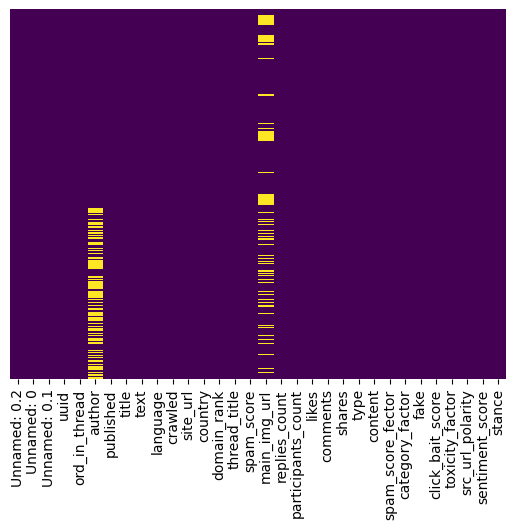

In [32]:
# to check missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
# clean text
df['text'] = df['text'].apply(lambda x: CleaningText(x))
df.text.fillna(df.title, inplace=True)

In [34]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'uuid', 'ord_in_thread',
       'author', 'published', 'title', 'text', 'language', 'crawled',
       'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score',
       'main_img_url', 'replies_count', 'participants_count', 'likes',
       'comments', 'shares', 'type', 'content', 'spam_score_fector',
       'category_factor', 'fake', 'click_bait_score', 'toxicity_factor',
       'src_url_polarity', 'sentiment_score', 'stance'],
      dtype='object')

In [35]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()
df['category_factor_num'] = lb_encode.fit_transform(df['category_factor'])
df['stance_factor_num'] = 0
df.loc[df.stance.str.contains('discuss'),'stance_factor_num'] = 0.3
df.loc[df.stance.str.contains('unrelated'),'stance_factor_num'] = 1.0
df.loc[df.stance.str.contains('agree'),'stance_factor_num'] = 0
df.loc[df.stance.str.contains('disagree'),'stance_factor_num'] = 0.8

df.head()

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1  \
0             0           0             0   
1             1           1             1   
2             2           2             2   
3             3           3             3   
4             4           4             4   

                                       uuid  ord_in_thread  \
0  6a175f46bcd24d39b3e962ad0f29936721db70db              0   
1  2bdc29d12605ef9cf3f09f9875040a7113be5d5b              0   
2  c70e149fdd53de5e61c29281100b9de0ed268bc3              0   
3  7cf7c15731ac2a116dd7f629bd57ea468ed70284              0   
4  0206b54719c7e241ffe0ad4315b808290dbe6c0f              0   

                 author           published  \
0     Barracuda Brigade 2016-01-26 00:10:00   
1  reasoning with facts 2016-01-29 00:10:00   
2     Barracuda Brigade 2016-01-31 00:10:00   
3                Fed Up 2016-01-01 00:11:00   
4                Fed Up 2016-01-01 00:11:00   

                                               title  \
0  Muslims BUSTED  They Stole Millions In Gov   t...   
1  Re  Why Did Attorney General Loretta Lynch Ple...   
2  BREAKING  Weiner Cooperating With FBI On Hilla...   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...   

                                                text language  \
0  print pay back money plu interest entir famili...  english   
1  attorney gener loretta lynch plead fifth barra...  english   
2  red state fox news sunday report morn anthoni ...  english   
3  email kayla mueller prison tortur isi chanc re...  english   
4  email healthcar reform make america great sinc...  english   

                         crawled             site_url country  domain_rank  \
0  2016-10-27T01:49:27.168+03:00  100percentfedup.com      US        88465   
1  2016-10-29T08:47:11.259+03:00  100percentfedup.com      US        88465   
2  2016-10-31T01:41:49.479+02:00  100percentfedup.com      US        88465   
3  2016-11-01T15:46:26.304+02:00  100percentfedup.com      US        88465   
4  2016-11-01T23:59:42.266+02:00  100percentfedup.com      US        88465   

                                        thread_title  spam_score  \
0  Muslims BUSTED: They Stole Millions In Gov‚Äôt...       0.000   
1  Re: Why Did Attorney General Loretta Lynch Ple...       0.000   
2  BREAKING: Weiner Cooperating With FBI On Hilla...       0.000   
3  PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...       0.068   
4  FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...       0.865   

                                        main_img_url  replies_count  \
0  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
1  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
2  http://bb4sp.com/wp-content/uploads/2016/10/Fu...              0   
3  http://100percentfedup.com/wp-content/uploads/...              0   
4  http://100percentfedup.com/wp-content/uploads/...              0   

   participants_count  likes  comments  shares  type  \
0                   1      0         0       0  bias   
1                   1      0         0       0  bias   
2                   1      0         0       0  bias   
3                   0      0         0       0  bias   
4                   0      0         0       0  bias   

                                             content  spam_score_fector  \
0  print they pay back money plus interest the en...           0.993337   
1  why did attorney general loretta lynch plead t...           0.824470   
2  red state fox news sunday reported morning ant...           0.998415   
3  email kayla mueller prisoner tortured isis cha...           0.982233   
4  email healthcare reform to make america great ...           0.976653   

  category_factor  fake  click_bait_score  toxicity_factor  src_url_polarity  \
0        business     0          0.999951                0               1.0   
1        business     0          0.997981                0               1.0   
2        busine

In [36]:
df.fake.unique()

array([0, 1])

In [37]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
tc = numeric_df.corr()  # Calculate correlation matrix


<Axes: >

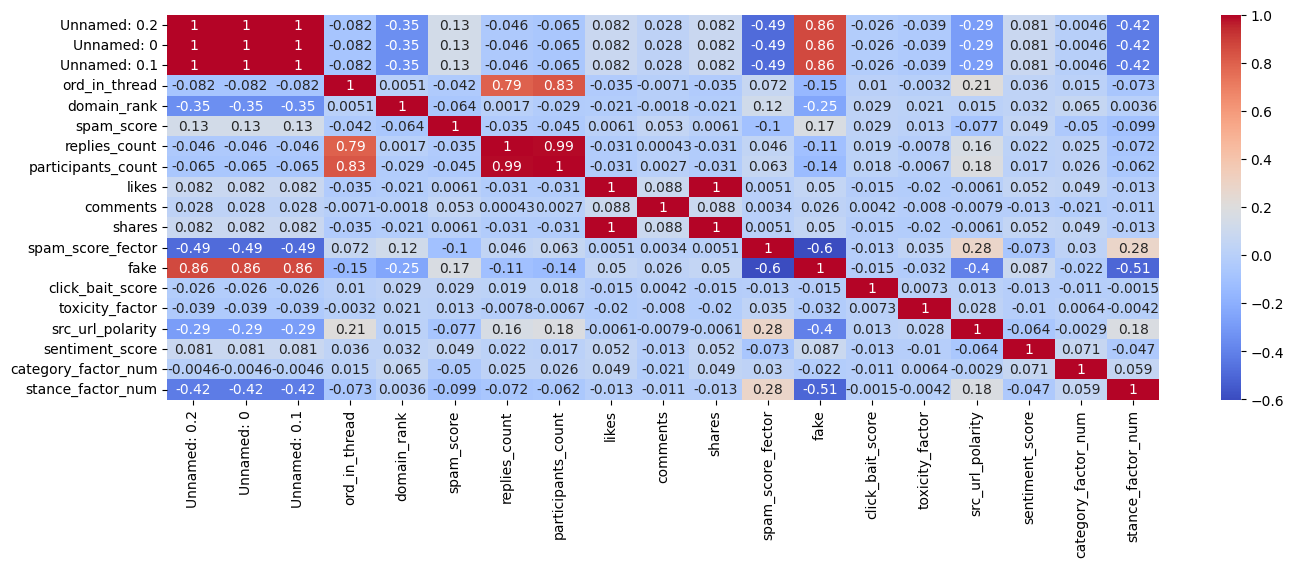

In [38]:
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

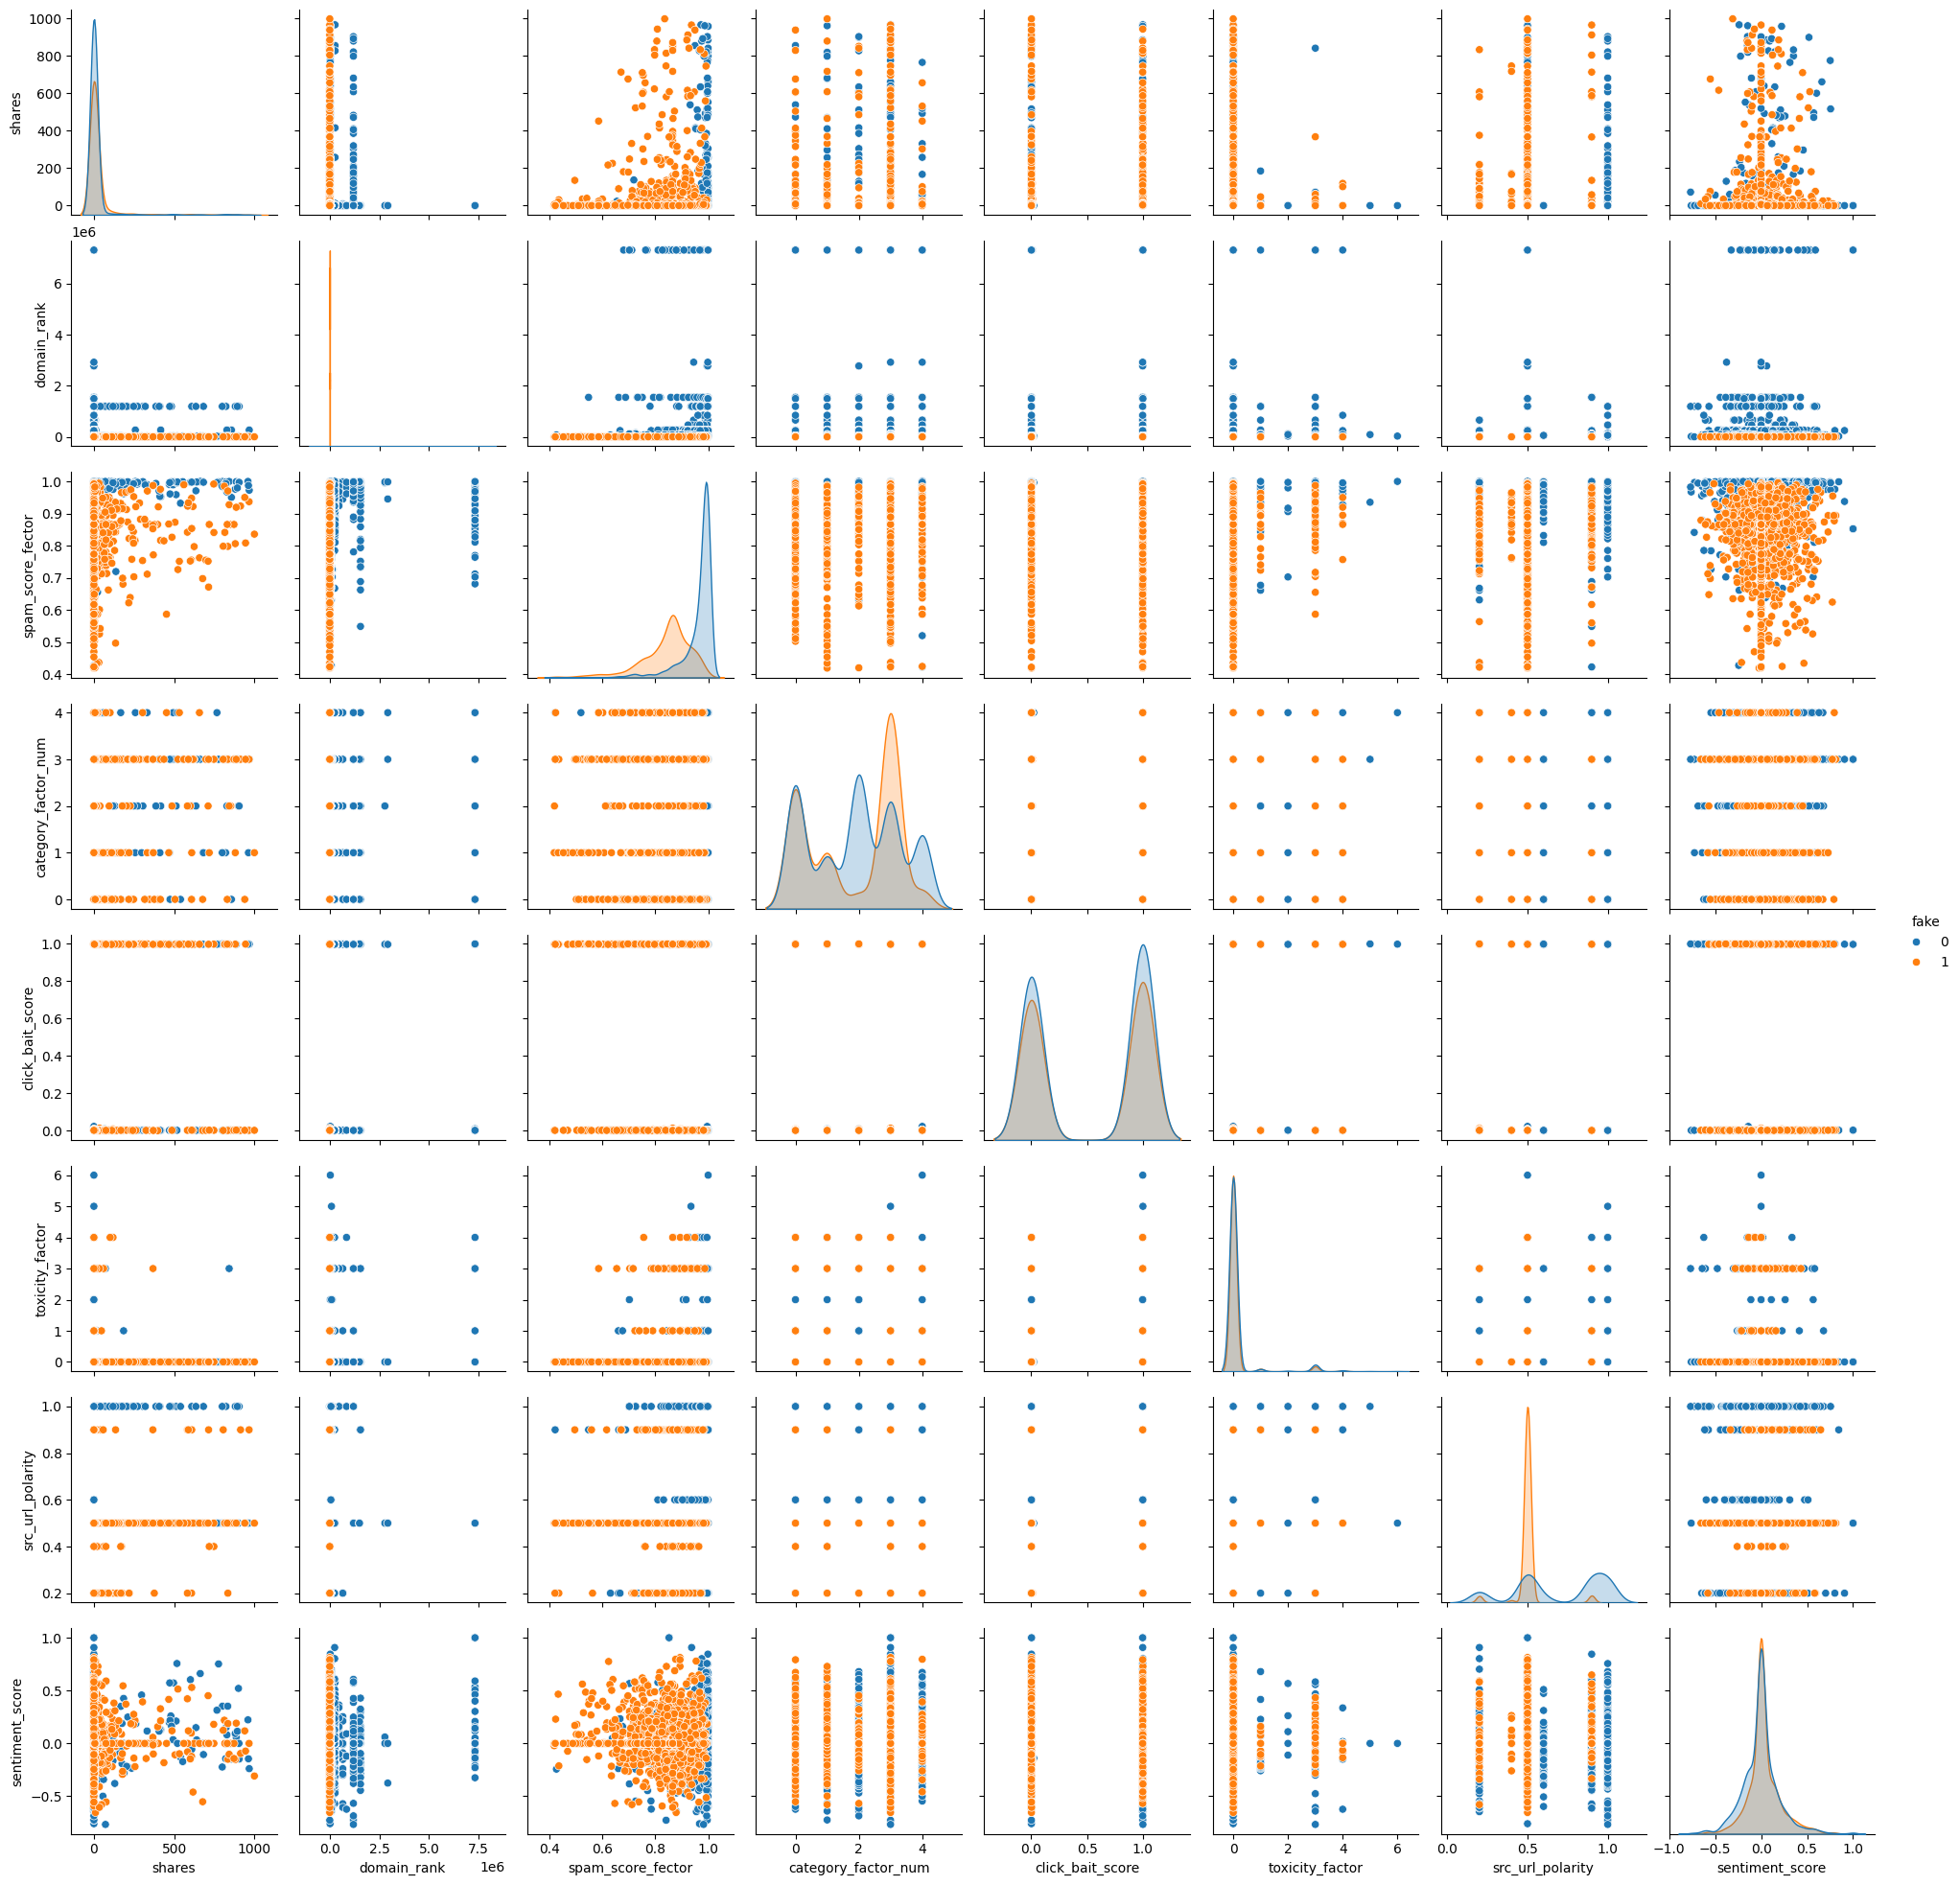

In [39]:
# to see pattern

dk= df[[ 'shares','domain_rank','spam_score_fector','fake','category_factor_num','click_bait_score','toxicity_factor','src_url_polarity','stance','sentiment_score']]
dk.head()
sns.pairplot(data=dk, hue="fake", dropna='true')

In [40]:
#plotly fix
configure_plotly_browser_state()

## target count ##
cnt_srs = df['type'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Picnic',
        reversescale = True
    ),
)

layout = go.Layout(
    title='Target Count',
    font=dict(size=18)
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="TargetCount")

## target distribution ##
labels = (np.array(cnt_srs.index))
sizes = (np.array((cnt_srs / cnt_srs.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Target distribution',
    font=dict(size=18),
    width=600,
    height=600,
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="usertype")

In [41]:
!pip install wordcloud
import requests
from wordcloud import WordCloud, STOPWORDS  #install $ pip install wordcloud

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0),
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size,
                    random_state = 42,
                    width=800,
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))

    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'green',
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()


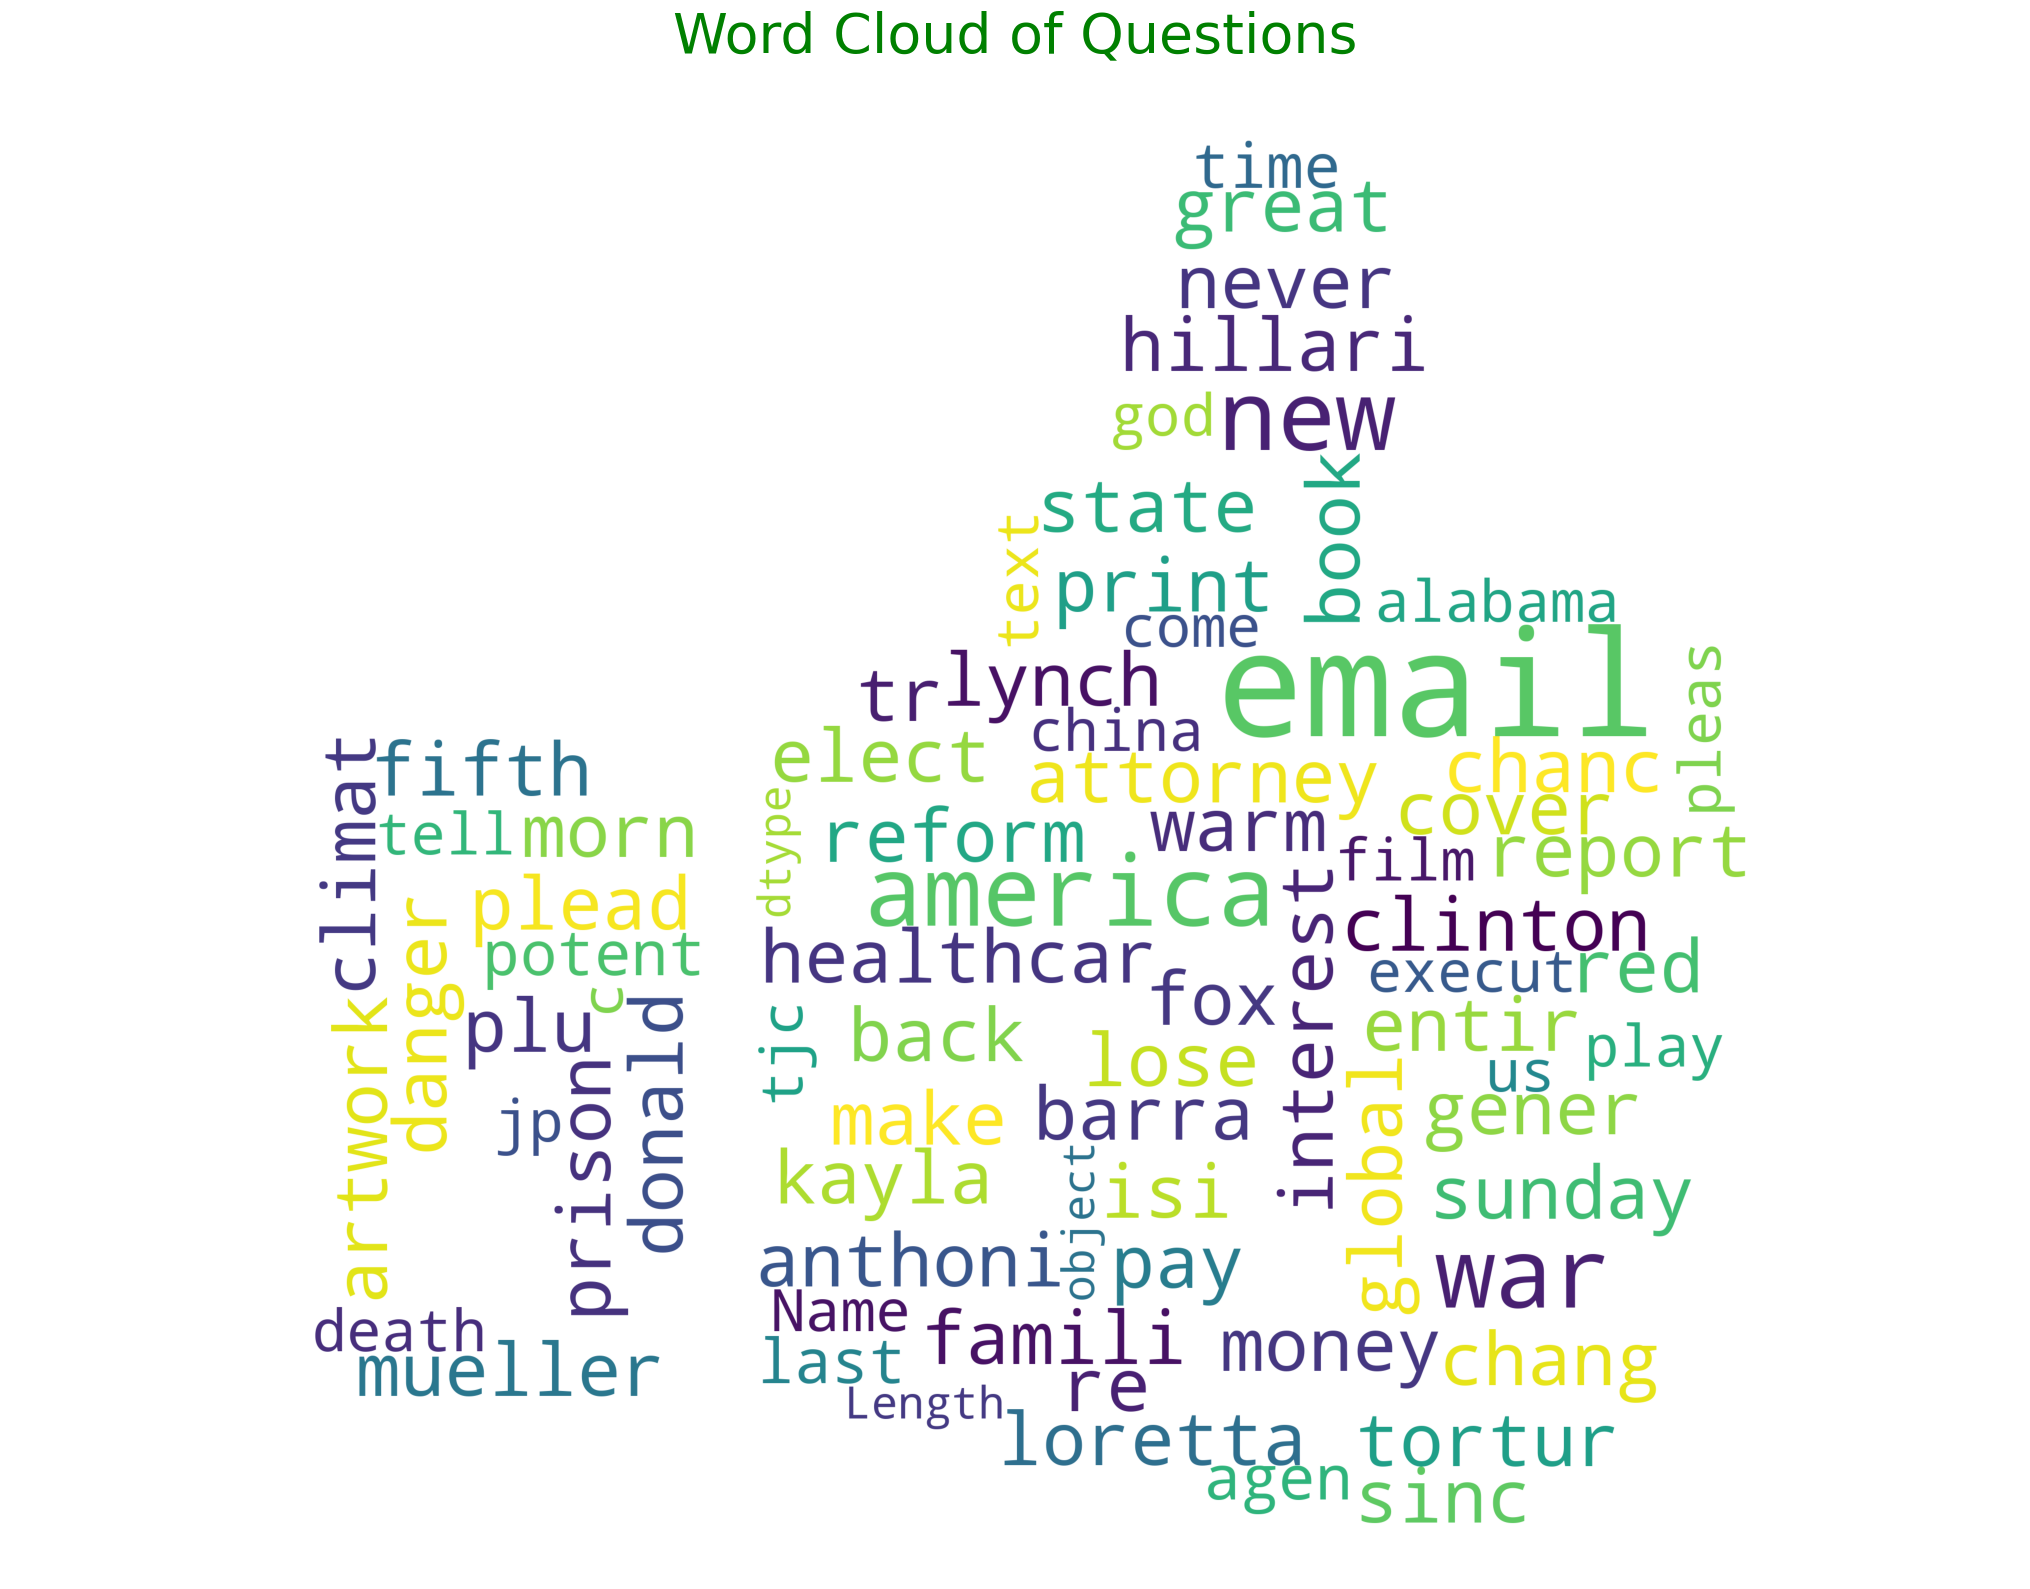

In [42]:
response = requests.get('https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(df[df["fake"]==0]["text"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

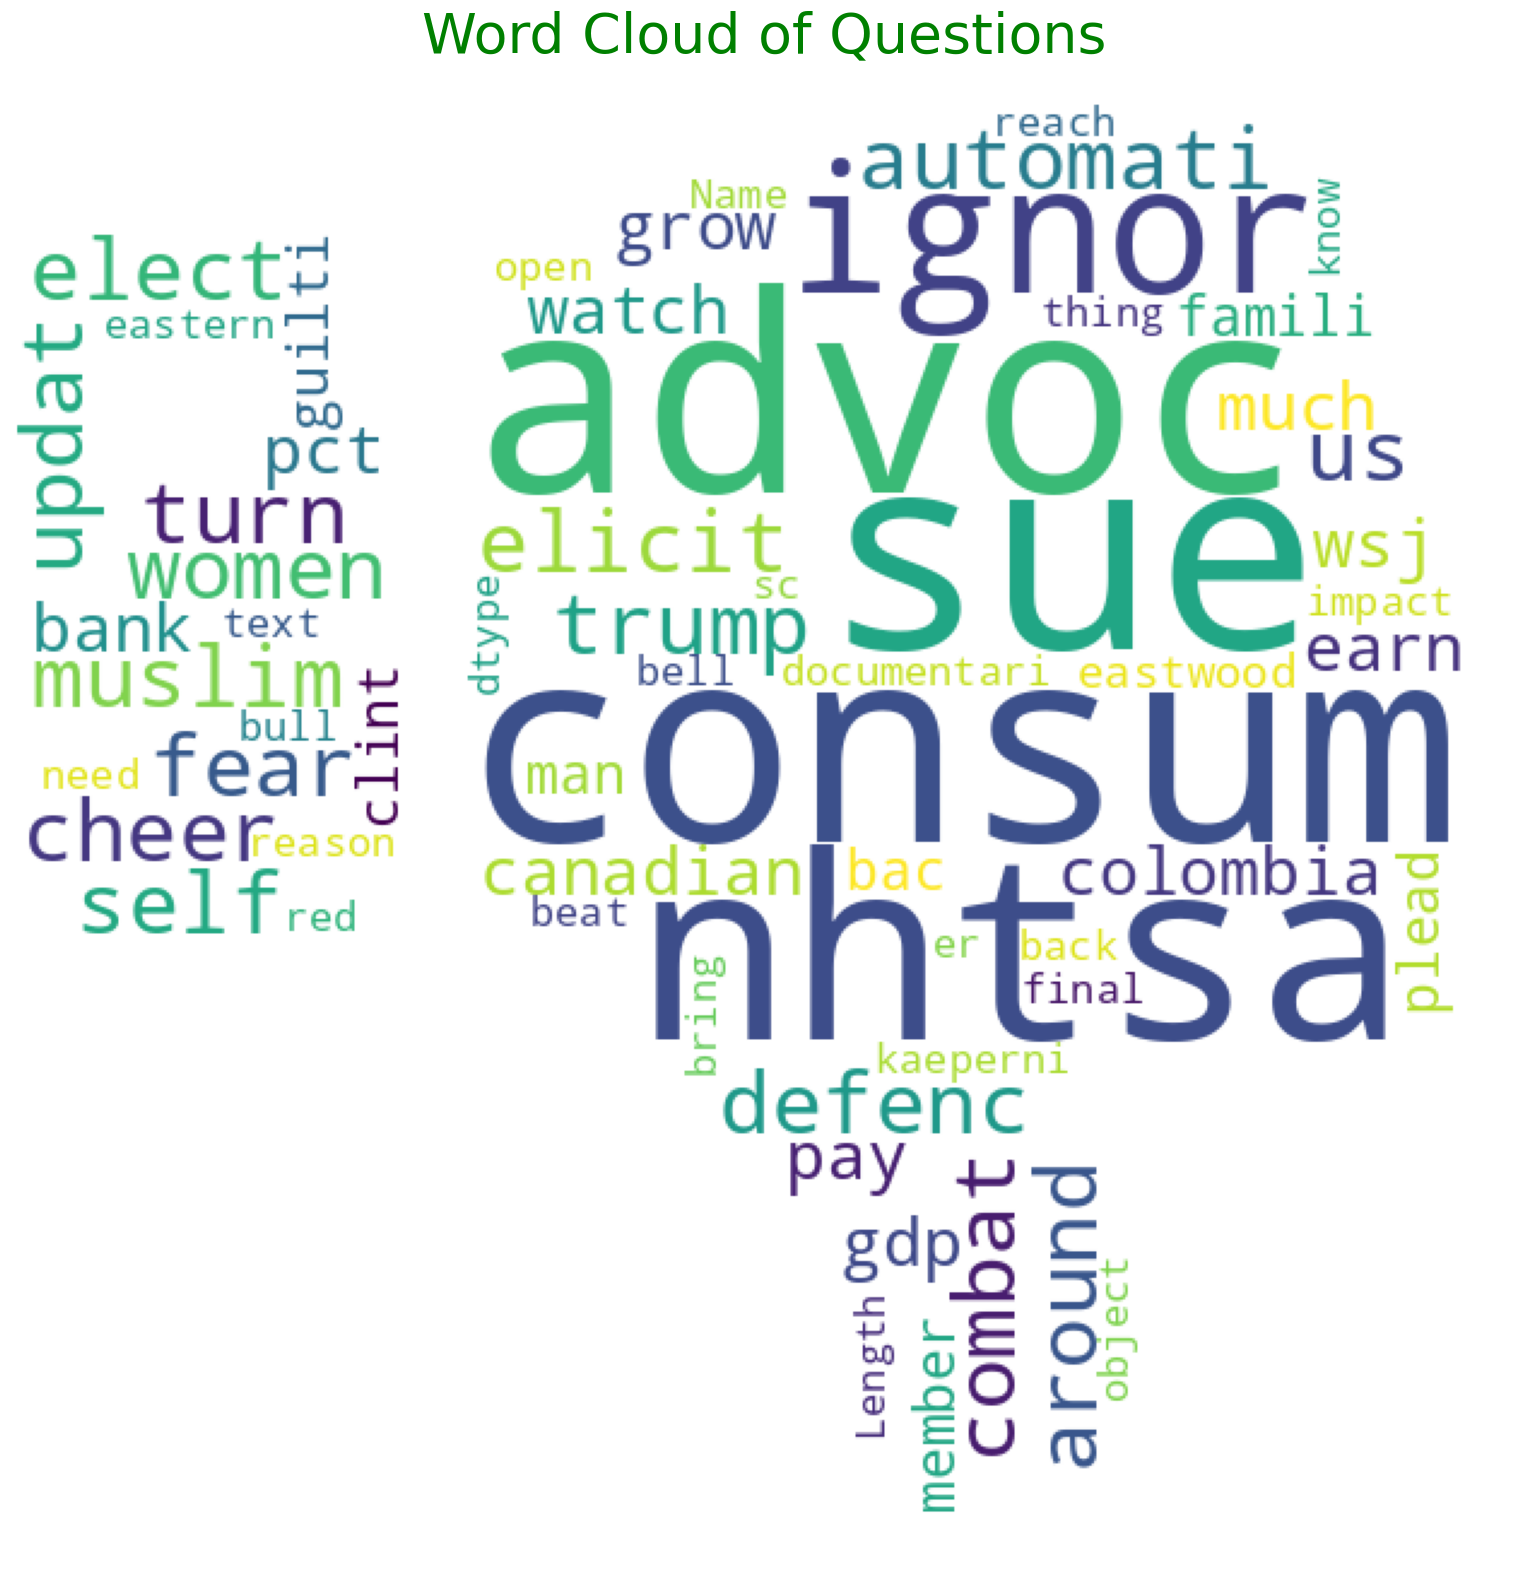

In [43]:
response = requests.get('https://image.freepik.com/free-icon/thumbs-down-silhouette_318-41911.jpg')
upvote_mask = np.array(Image.open(BytesIO(response.content)))#https://raw.githubusercontent.com/manojknit/Natural_Language_Processing/master/images/upvote.png
plot_wordcloud(df[df["fake"]==1]["text"], upvote_mask, max_words=300000, max_font_size=300, title="Word Cloud of Questions")

In [44]:
from collections import defaultdict
df_real = df[df["type"]=='news']
df_fake = df[df["type"]!='news']

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

In [45]:
# for colab plotly
configure_plotly_browser_state()

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


## Get the bar chart from insincere questions ##
freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent, 1):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of real news",
                                          "Frequent words of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

#plt.figure(figsize=(10,16))
#sns.barplot(x="ngram_count", y="ngram", data=fd_sorted.loc[:50,:], color="b")
#plt.title("Frequent words for Insincere Questions", fontsize=16)
#plt.show()

In [46]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of real news",
                                          "Frequent bigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

In [47]:
# for colab plotly
configure_plotly_browser_state()

freq_dict = defaultdict(int)
for sent in df_real["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


freq_dict = defaultdict(int)
for sent in df_fake["text"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(50), 'green')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of real news",
                                          "Frequent trigrams of fake news"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

In [48]:
## Number of words in the text ##
df["num_words"] = df["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
df["num_unique_words"] = df["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
df["num_chars"] = df["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
df["num_stopwords"] = df["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

## Number of punctuations in the text ##
df["num_punctuations"] =df['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of title case words in the text ##
df["num_words_upper"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
df["num_words_title"] = df["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
df["mean_word_len"] = df["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

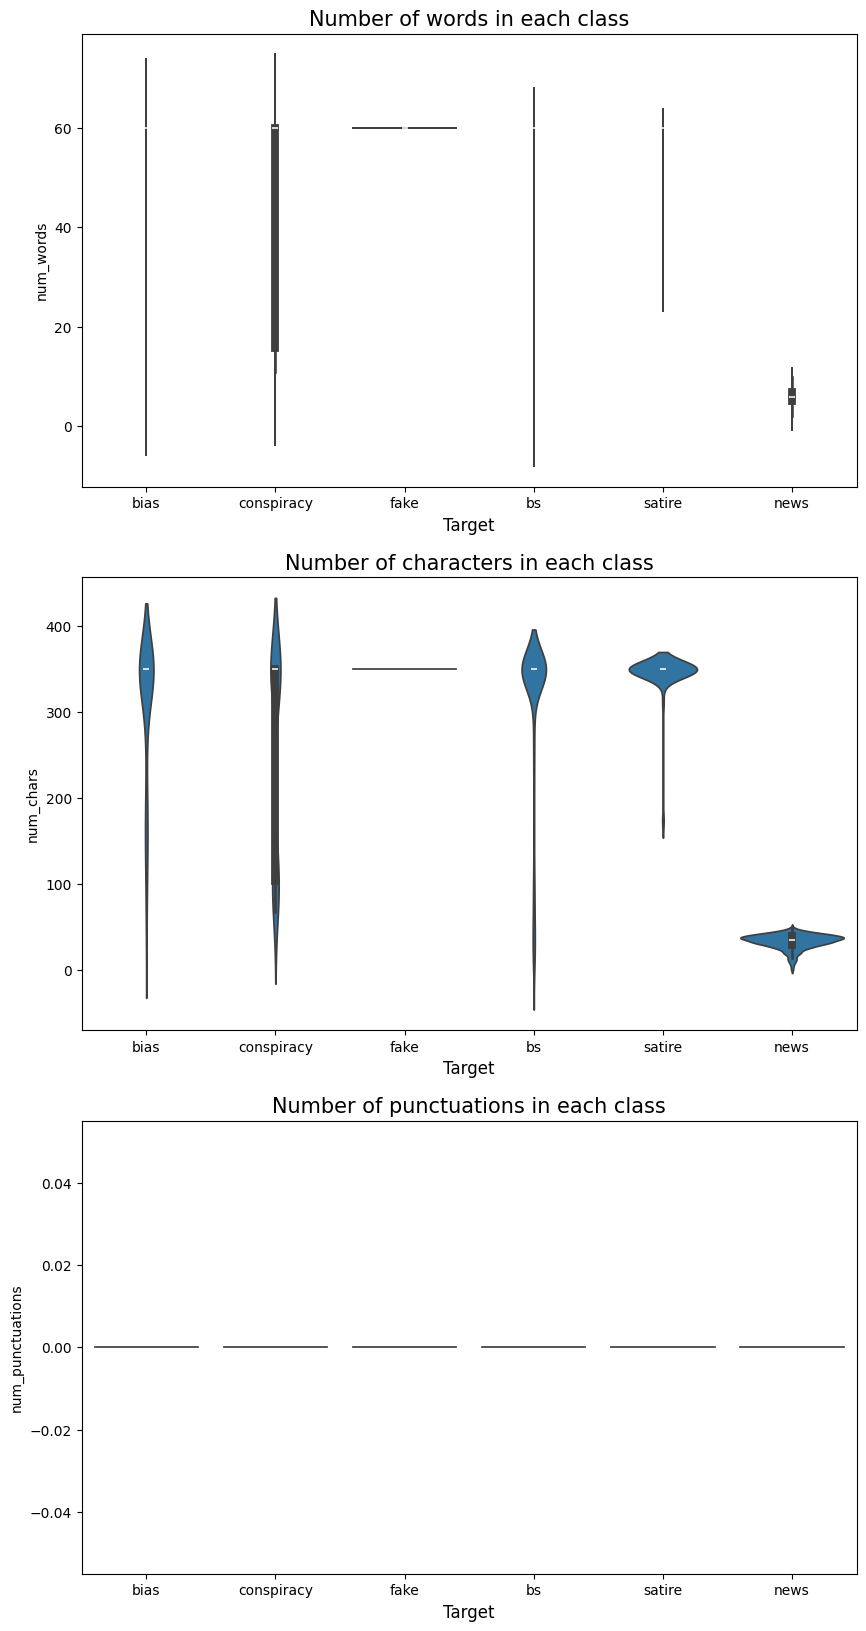

In [49]:
## Truncate some extreme values for better visuals ##
df['num_words'].loc[df['num_words']>60] = 60 #truncation for better visuals
df['num_punctuations'].loc[df['num_punctuations']>10] = 10 #truncation for better visuals
df['num_chars'].loc[df['num_chars']>350] = 350 #truncation for better visuals

f, axes = plt.subplots(3, 1, figsize=(10,20))
sns.violinplot(x='type', y='num_words', data=df, ax=axes[0])
axes[0].set_xlabel('Target', fontsize=12)
axes[0].set_title("Number of words in each class", fontsize=15)

sns.violinplot(x='type', y='num_chars', data=df, ax=axes[1])
axes[1].set_xlabel('Target', fontsize=12)
axes[1].set_title("Number of characters in each class", fontsize=15)

sns.violinplot(x='type', y='num_punctuations', data=df, ax=axes[2])
axes[2].set_xlabel('Target', fontsize=12)
#plt.ylabel('Number of punctuations in text', fontsize=12)
axes[2].set_title("Number of punctuations in each class", fontsize=15)
plt.show()

In [50]:
import nltk
import re

from gensim.models import word2vec
from sklearn.manifold import TSNE

In [51]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for sentence in df["text"].iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)

    return corpus

In [52]:
corpus = [value for value in data]


In [53]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

<Axes: >

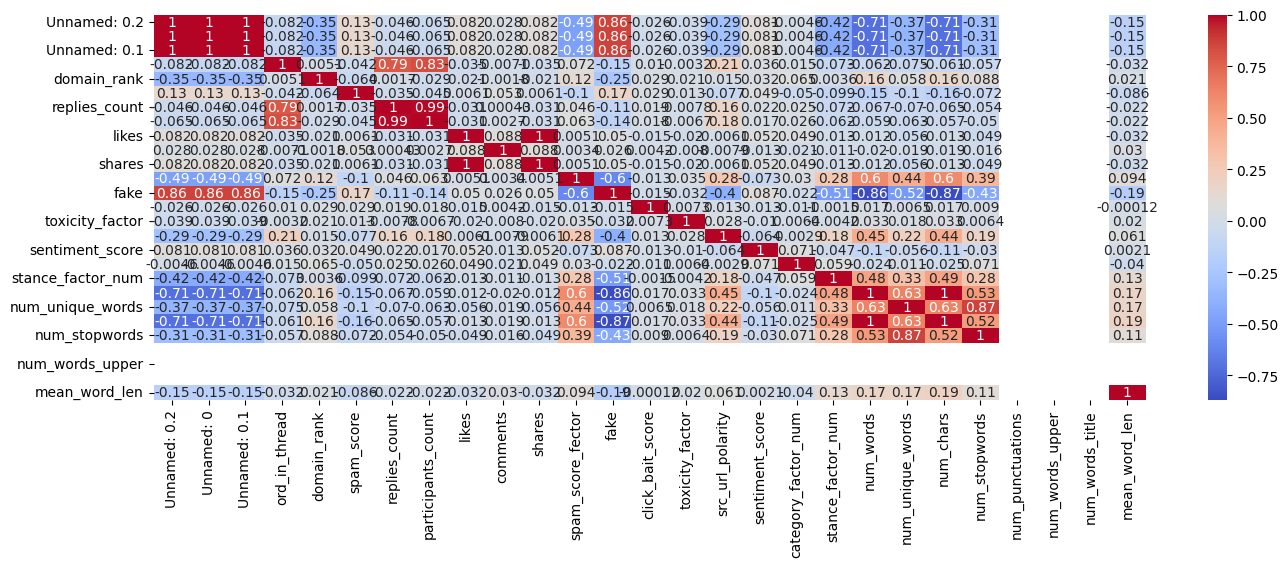

In [54]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
tc = numeric_df.corr()  # Calculate correlation matrix
plt.figure(figsize = (16,5))
sns.heatmap(tc, annot=True, cmap='coolwarm')

In [55]:
X = df[[ 'spam_score_fector','click_bait_score', 'category_factor_num', 'toxicity_factor','src_url_polarity','sentiment_score','stance_factor_num']]
#title	text	language	site_url	country	domain_rank	thread_title	spam_score	main_img_url	shares	type stance_factor_num'	spam_score_fector	category_factor	fake	click_bait_score	toxicity_factor	src_url_polarity	type_num
y = df['fake']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

In [57]:
# dropping columns which are not relevant or similar columns.
Xr = df[[ 'domain_rank','num_words']]
# target
yr = df['fake']

In [58]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=.25, random_state = 100)

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

In [60]:
from sklearn.metrics import  average_precision_score, precision_recall_curve


# Function to get Precision recall curve
def get_prec_recall (y_test,y_pred):
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score : {}'.format(average_precision))
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,color='cyan')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    return

In [61]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
#Getting feature importances
print(logmodel.coef_)

[[-1.26177213e+01 -2.40694853e-03  3.38416005e-02 -1.68152236e-02
  -3.74366665e+00  8.24924086e-01 -6.44855006e+00]]


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       506
           1       0.83      0.87      0.85       422

    accuracy                           0.86       928
   macro avg       0.86      0.86      0.86       928
weighted avg       0.86      0.86      0.86       928



In [65]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8727018385291767

Model Accuracy for Logistic Regression: 0.8577586206896551


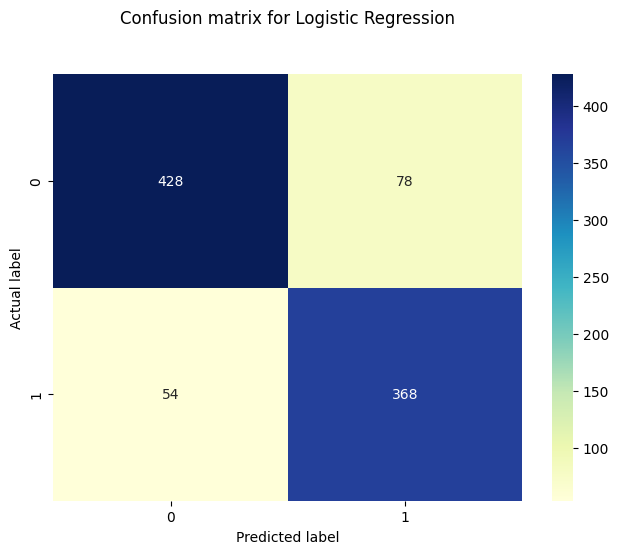

In [66]:
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_logreg = metrics.confusion_matrix(y_test, predictions)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Logistic Regression:",metrics.accuracy_score(y_test, predictions))

In [67]:
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test,predictions)*100)

Accuracy :  85.77586206896551


In [68]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,predictions) #y_target, y_pred

0.14224137931034483

In [69]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,predictions) #y_target, y_pred

0.14224137931034483

In [70]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,predictions)

5.1268989734520085

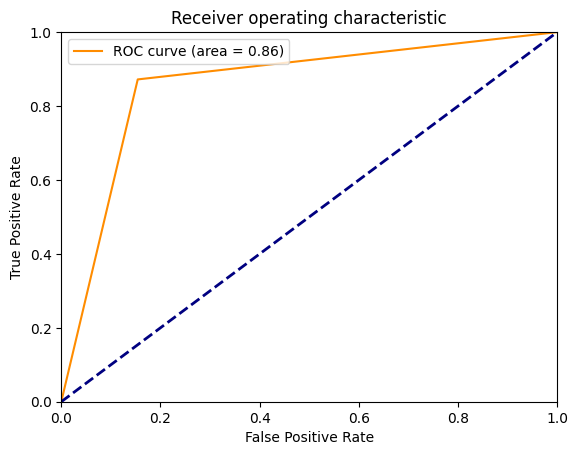

In [71]:
# Get ROC curve for Logistic Regression

get_roc(y_test,predictions)

Average precision-recall score : 0.7777186968913266


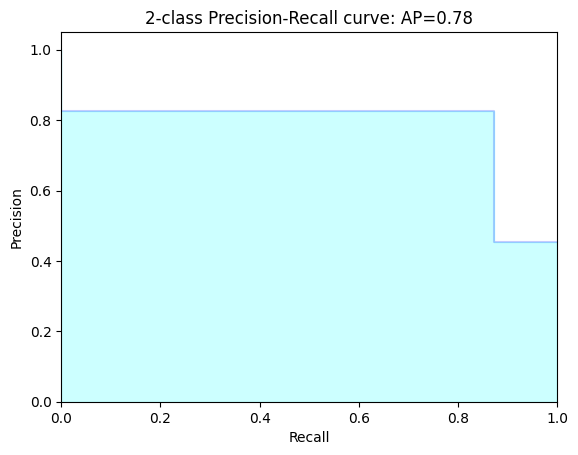

In [72]:
get_prec_recall(y_test,predictions)

In [73]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(logmodel, X, y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)

print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(logmodel.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
LogisticRegression average accuracy: 0.864 (+/-0.053)
LogisticRegression average log_loss: 0.314 (+/-0.079)
LogisticRegression average auc: 0.942 (+/-0.037)


In [74]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB()

In [75]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       506
           1       0.86      0.90      0.88       422

    accuracy                           0.89       928
   macro avg       0.89      0.89      0.89       928
weighted avg       0.89      0.89      0.89       928



In [77]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8831334932054358

Model Accuracy for Naive Bayes: 0.8879310344827587


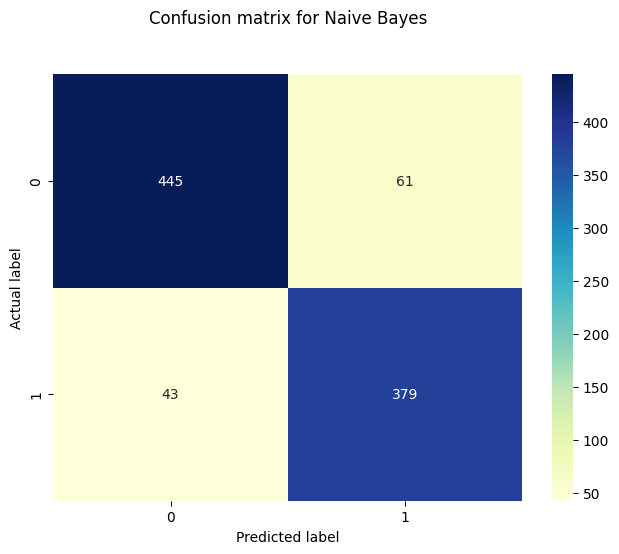

In [78]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Naive Bayes:",metrics.accuracy_score(y_test, y_pred))

In [79]:
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  88.79310344827587


In [80]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred) #y_target, y_pred

0.11206896551724138

In [81]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred) #y_target, y_pred

0.11206896551724138

In [82]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

4.03937494878037

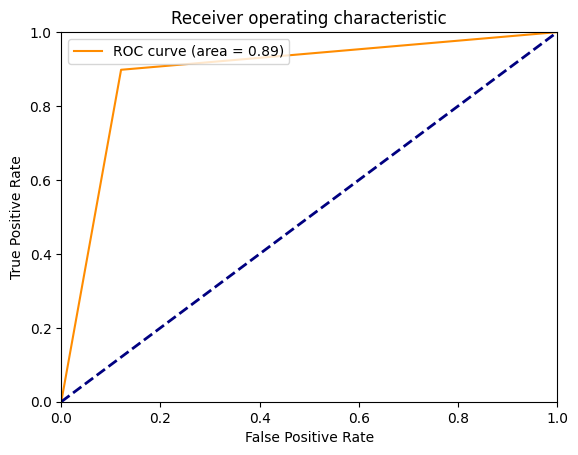

In [83]:
get_roc(y_test,y_pred)

Average precision-recall score : 0.8199305627776374


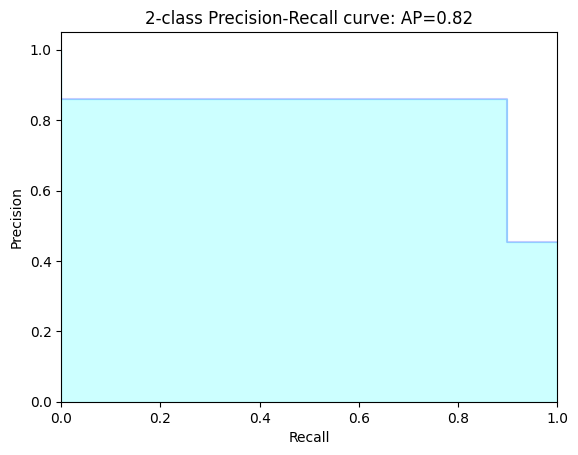

In [84]:
get_prec_recall(y_test,y_pred)

In [85]:
# Applying k-Fold Cross Validation for test set
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logmodel, X = X_test, y = y_test, cv = 10)
accuracies.mean()

0.8470546984572229

In [86]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(classifier, X_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(classifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
GaussianNB average accuracy: 0.883 (+/-0.020)
GaussianNB average log_loss: 0.373 (+/-0.081)
GaussianNB average auc: 0.950 (+/-0.011)


In [87]:
decclassifier = DecisionTreeClassifier(criterion ='entropy')
decclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [88]:
y_pred = decclassifier.predict(X_test)

In [89]:
'''
!pip install pydotplus
!pip install graphviz
!pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz
!pip install --upgrade pydot
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decclassifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
'''

'\n!pip install pydotplus\n!pip install graphviz\n!pip install -Iv https://pypi.python.org/packages/source/p/pyparsing/pyparsing-1.5.7.tar.gz\n!pip install --upgrade pydot\nfrom sklearn.externals.six import StringIO\nfrom IPython.display import Image\nfrom sklearn.tree import export_graphviz\nimport pydotplus\ndot_data = StringIO()\nexport_graphviz(decclassifier, out_file=dot_data,\n                filled=True, rounded=True,\n                special_characters=True)\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())\nImage(graph.create_png())\n'

In [90]:

decclassifier.feature_importances_

array([0.51810554, 0.08398412, 0.04370147, 0.00448521, 0.19058368,
       0.04837597, 0.11076401])

<Axes: >

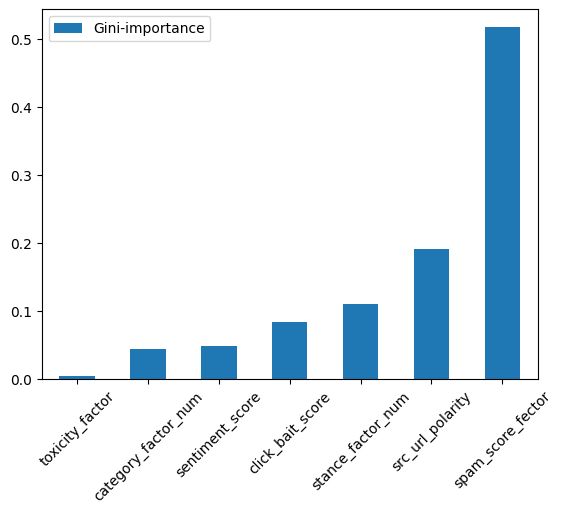

In [91]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, decclassifier.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

In [92]:
#Validation
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[464,  42],
       [ 48, 374]])

In [93]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       506
           1       0.90      0.89      0.89       422

    accuracy                           0.90       928
   macro avg       0.90      0.90      0.90       928
weighted avg       0.90      0.90      0.90       928



In [94]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8946301023697171

Model Accuracy for Decision tree: 0.9030172413793104


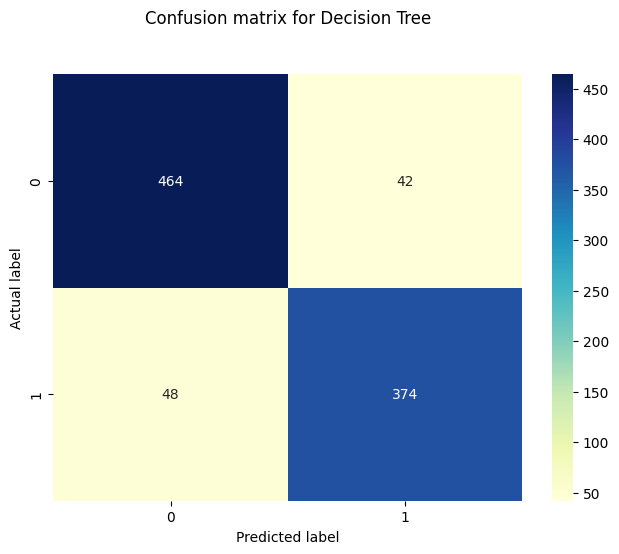

In [95]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_dectree = metrics.confusion_matrix(y_test, y_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_dectree), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision tree:",metrics.accuracy_score(y_test, y_pred))

In [96]:
#from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  90.30172413793103


In [97]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred) #y_target, y_pred

0.09698275862068965

In [98]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred) #y_target, y_pred

0.09698275862068965

In [99]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,y_pred)

3.495612936444552

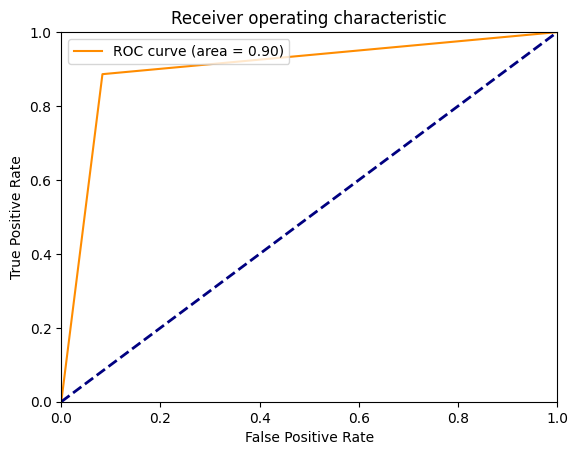

In [100]:
# Get ROC curve for Decision Tree

get_roc(y_test,y_pred)

Average precision-recall score : 0.8485023005267327


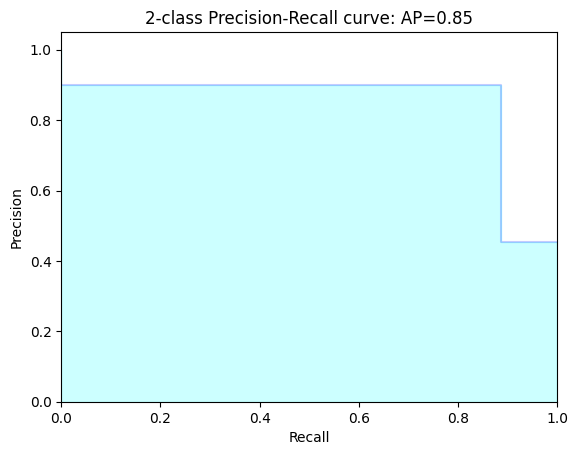

In [101]:
get_prec_recall(y_test,y_pred)

In [102]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = decclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.8949923931822283

In [103]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(decclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(decclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
DecisionTreeClassifier average accuracy: 0.900 (+/-0.018)
DecisionTreeClassifier average log_loss: 3.603 (+/-0.664)
DecisionTreeClassifier average auc: 0.899 (+/-0.018)


In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [105]:
rfc_pred = rfc.predict(X_test)

In [106]:
#'spam_score_fector','click_bait_score','toxicity_factor','src_url_polarity','sentiment_score','stance_factor_num'
rfc.feature_importances_

array([0.44953595, 0.07138767, 0.04455235, 0.00375054, 0.20662034,
       0.05939682, 0.16475632])

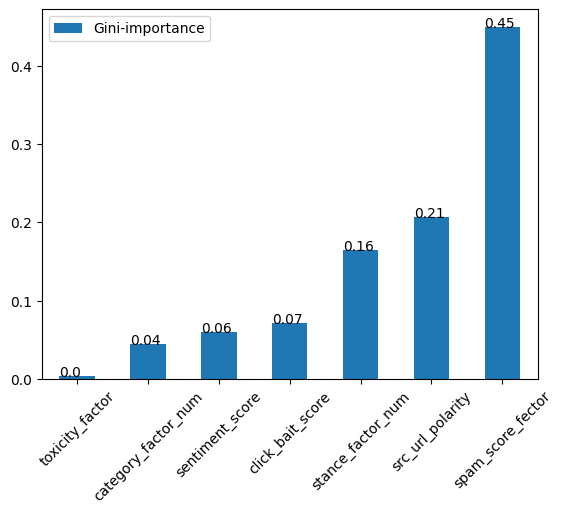

In [107]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x(), p.get_height()))

In [108]:
print(confusion_matrix(y_test,rfc_pred))

[[472  34]
 [ 18 404]]


In [109]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       506
           1       0.92      0.96      0.94       422

    accuracy                           0.94       928
   macro avg       0.94      0.95      0.94       928
weighted avg       0.94      0.94      0.94       928



In [110]:

#from sklearn.metrics import accuracy_score
print ("Accuracy : ", metrics.accuracy_score(y_test,rfc_pred)*100 )

Accuracy :  94.39655172413794


In [111]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,rfc_pred) #y_target, y_pred

0.05603448275862069

In [112]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,rfc_pred) #y_target, y_pred

0.05603448275862069

In [113]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,rfc_pred)

2.019687474390185

Model Accuracy for Decision tree: 90.30172413793103


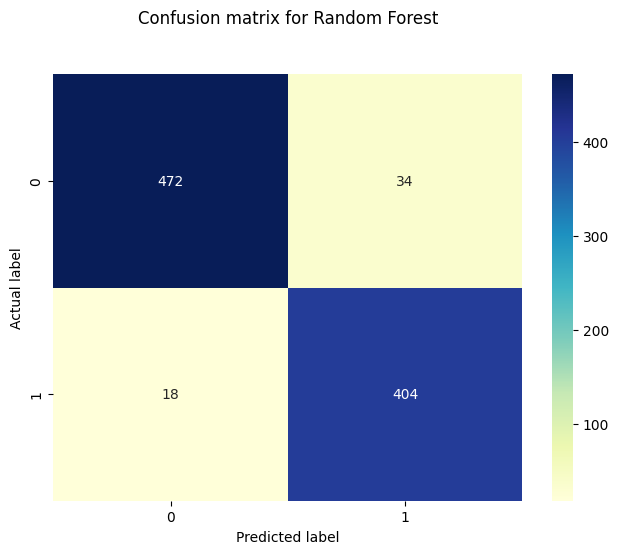

In [114]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_test,predictions))
cnf_matrix_rf = metrics.confusion_matrix(y_test, rfc_pred)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_rf), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for Decision tree:",metrics.accuracy_score(y_test, y_pred)  * 100)

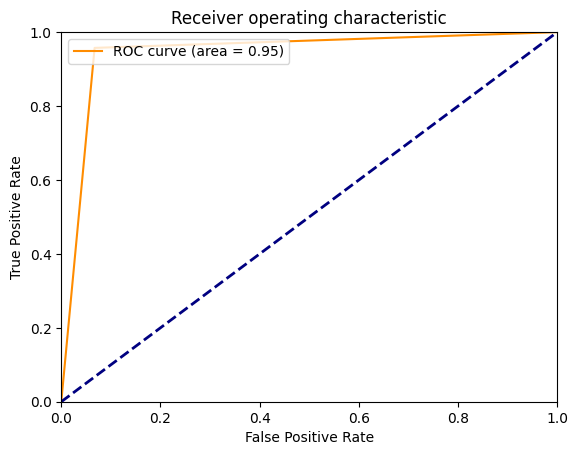

In [115]:
get_roc(y_test,rfc_pred)

Average precision-recall score : 0.9024279958151158


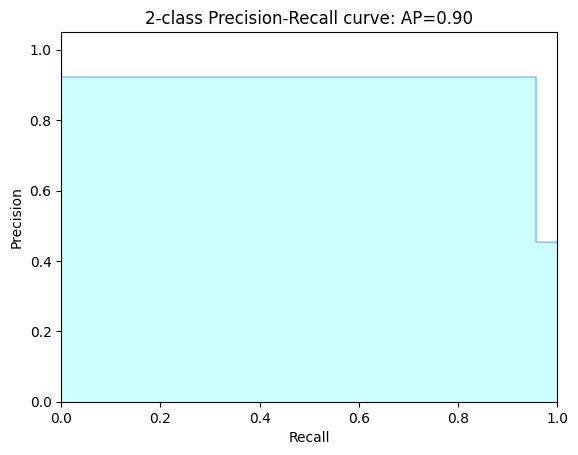

In [116]:
get_prec_recall(y_test,rfc_pred)

In [117]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
accuracies.mean()


0.9295221887006523

In [118]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(rfc, X_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(rfc.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
RandomForestClassifier average accuracy: 0.930 (+/-0.017)
RandomForestClassifier average log_loss: 0.199 (+/-0.034)
RandomForestClassifier average auc: 0.972 (+/-0.009)


In [119]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
svcclassifier = SVC(kernel = 'rbf', random_state = 0, gamma=0.8, C=100, probability=True)
svcclassifier.fit(X_train, y_train)

SVC(C=100, gamma=0.8, probability=True, random_state=0)

In [120]:
svc_pred = svcclassifier.predict(X_test)

In [121]:
#print (svcclassifier.get_feature_names())
print(classification_report(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       506
           1       0.90      0.94      0.92       422

    accuracy                           0.92       928
   macro avg       0.92      0.93      0.92       928
weighted avg       0.93      0.92      0.92       928



In [122]:
#from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test,svc_pred)*100)

Accuracy :  92.45689655172413


In [123]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,svc_pred) #y_target, y_pred

0.07543103448275862

In [124]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,svc_pred) #y_target, y_pred

0.07543103448275862

In [125]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,svc_pred)

2.718810061679095

Model Accuracy for SVM: 92.45689655172413


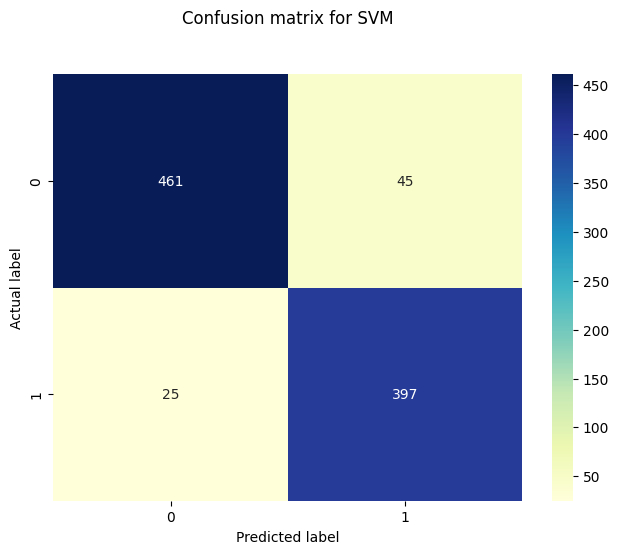

In [126]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, svc_pred)
#print(cm)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for SVM', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for SVM:",metrics.accuracy_score(y_test, svc_pred) * 100)


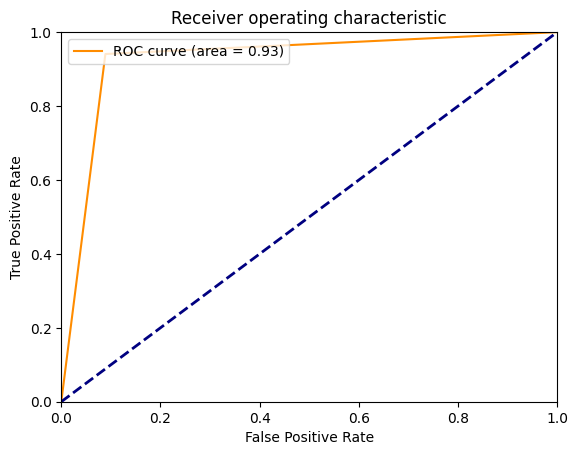

In [127]:
get_roc(y_test,svc_pred)

Average precision-recall score : 0.8719193896837903


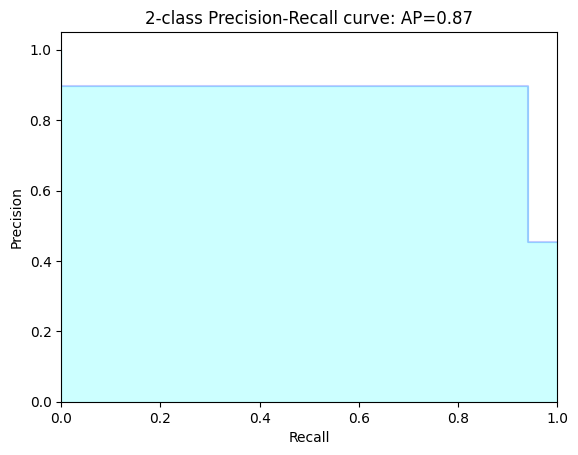

In [128]:
get_prec_recall(y_test,svc_pred)

In [129]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svcclassifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.9126273175008379

In [130]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(svcclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(svcclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
SVC average accuracy: 0.913 (+/-0.019)
SVC average log_loss: 0.235 (+/-0.037)
SVC average auc: 0.965 (+/-0.011)


In [131]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [132]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knnclassifier.fit(X_train_pca, y_train)

KNeighborsClassifier()

In [133]:
# Predicting the Test set results
knn_pred = knnclassifier.predict(X_test_pca)

In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       506
           1       0.87      0.90      0.88       422

    accuracy                           0.89       928
   macro avg       0.89      0.89      0.89       928
weighted avg       0.89      0.89      0.89       928



In [135]:
#from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(y_test,knn_pred)*100)

Accuracy :  89.22413793103449


In [136]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,knn_pred) #y_target, y_pred

0.10775862068965517

In [137]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,knn_pred) #y_target, y_pred

0.10775862068965517

In [138]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,knn_pred)

3.8840143738272794

Model Accuracy for KNN: 89.22413793103449


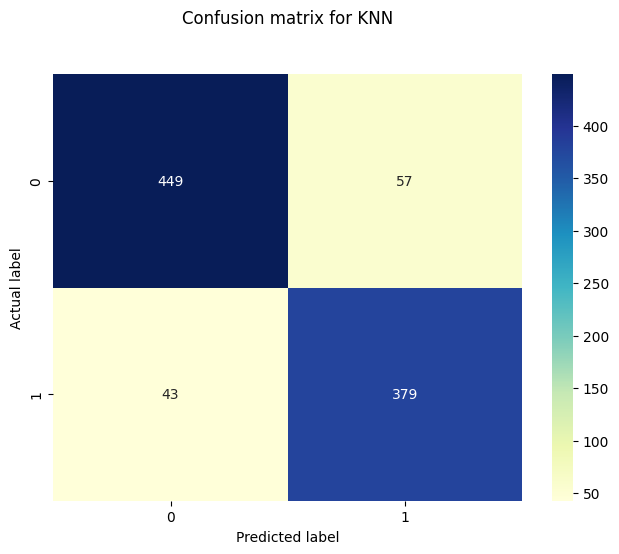

In [139]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
#print(cm)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for KNN', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for KNN:",metrics.accuracy_score(y_test, knn_pred) * 100)


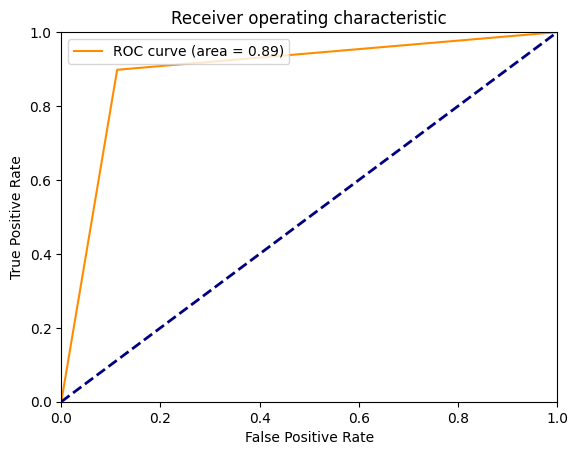

In [140]:
get_roc(y_test,knn_pred)

Average precision-recall score : 0.8270277587031519


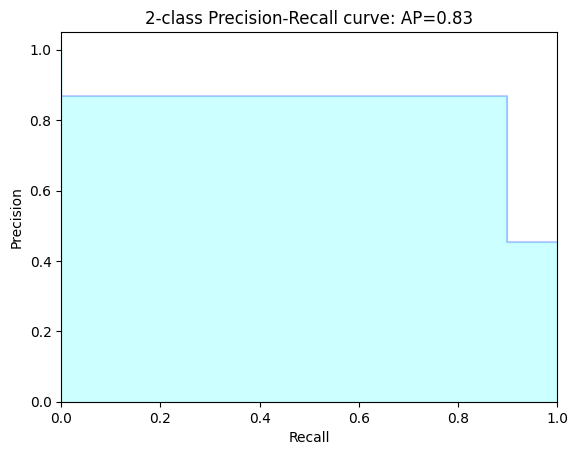

In [141]:
get_prec_recall(y_test,knn_pred)

In [142]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

results = cross_validate(knnclassifier, X_train, y_train, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(knnclassifier.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross-validation results:
KNeighborsClassifier average accuracy: 0.898 (+/-0.023)
KNeighborsClassifier average log_loss: 1.135 (+/-0.297)
KNeighborsClassifier average auc: 0.946 (+/-0.014)


In [143]:

# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgclassifier = XGBClassifier()
xgclassifier.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [144]:

# Predicting the Test set results
xg_pred = xgclassifier.predict(X_test)


In [145]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, xg_pred)
print(cm)
print("Model Accuracy for XGBoost:",metrics.accuracy_score(y_test, xg_pred))


[[466  40]
 [ 30 392]]
Model Accuracy for XGBoost: 0.9245689655172413


In [146]:

print(classification_report(y_test,xg_pred))


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       506
           1       0.91      0.93      0.92       422

    accuracy                           0.92       928
   macro avg       0.92      0.92      0.92       928
weighted avg       0.92      0.92      0.92       928



In [147]:
xgclassifier.feature_importances_

array([0.22842145, 0.02397863, 0.04860111, 0.0228482 , 0.36329263,
       0.02953128, 0.28332663], dtype=float32)

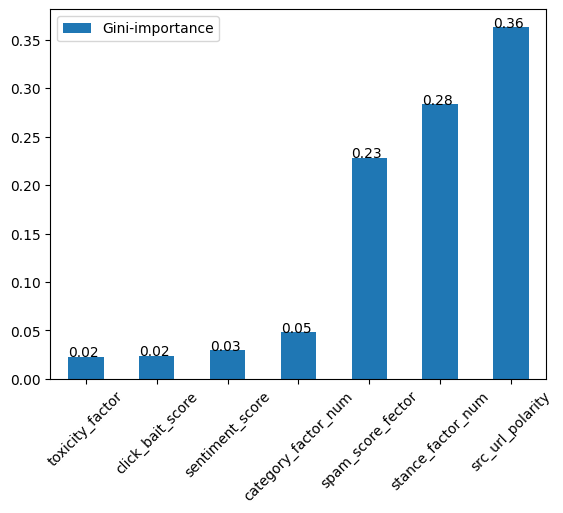

In [148]:
feats = {} # a dict to hold feature_name: feature_importance

for feature, importance in zip(X.columns, xgclassifier.feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x(), p.get_height()))

In [149]:

#from sklearn.metrics import accuracy_score
print ("Accuracy : ", metrics.accuracy_score(y_test,xg_pred)*100)


Accuracy :  92.45689655172413


In [150]:
#MAE L1 loss function - Should be close to 0
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,xg_pred) #y_target, y_pred

0.07543103448275862

In [151]:
#MAE L2 loss function - Should be close to 0
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,xg_pred) #y_target, y_pred

0.07543103448275862

In [152]:
# Log Loss  - Should be close to 0 - Only for classification models
from sklearn.metrics import log_loss
log_loss(y_test,xg_pred)

2.718810061679096

Model Accuracy for XGBoost: 92.45689655172413


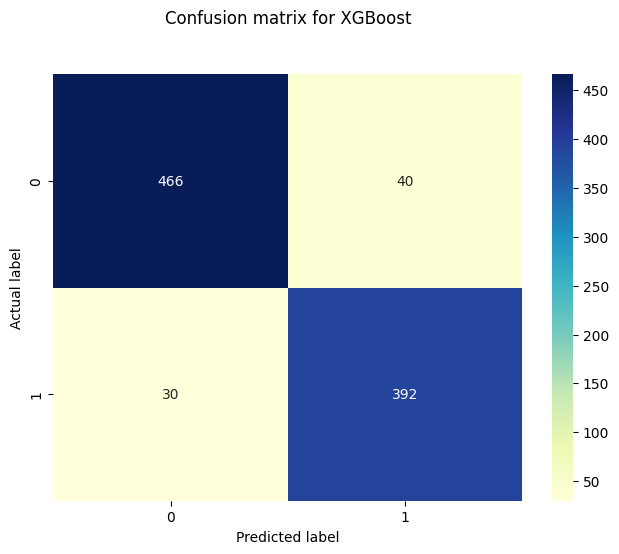

In [153]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, xg_pred)
#print(cm)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix for XGBoost', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("Model Accuracy for XGBoost:",metrics.accuracy_score(y_test, xg_pred) * 100)


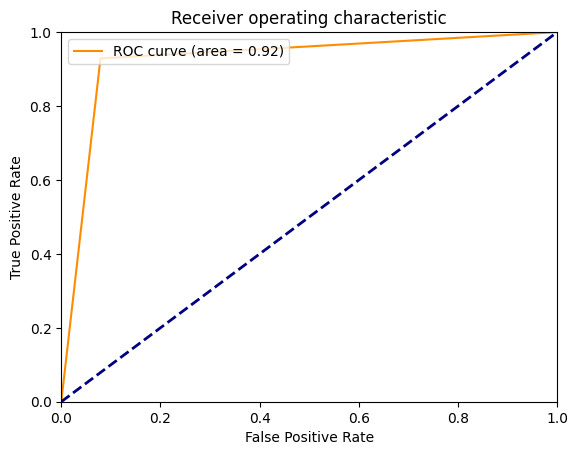

In [154]:
get_roc(y_test,xg_pred)

Average precision-recall score : 0.8270277587031519


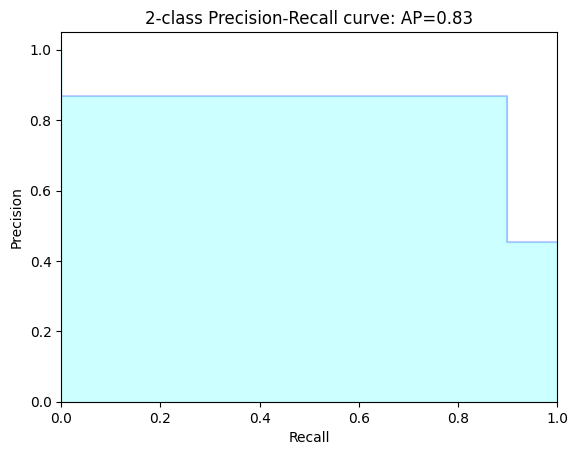

In [155]:
get_prec_recall(y_test,knn_pred)

In [156]:
# Get news fakeness classification as per % of fakeness
def getfakeness(num):
  num = num * 100
  if(num > 90):
    return 'True'
  elif(num > 75):
    return 'Mostly True'
  elif(num > 50):
    return 'Half True'
  elif(num > 40):
    return 'Mostly False'
  elif(num > 25):
    return 'False'
  else:
    return 'Pants On Fire'

In [157]:
# Test
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier.predict_proba(X_test)[0][1]))
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier.predict_proba(X_test)[2][1]))
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier.predict_proba(X_test)[6][1]))
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier.predict_proba(X_test)[10][1]))
# you can change index to test more like [index][1], Don't change 1.

Fakeness classification as per % = Pants On Fire
Fakeness classification as per % = True
Fakeness classification as per % = True
Fakeness classification as per % = Half True


In [158]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
xgclassifier_r = XGBClassifier()
xgclassifier_r.fit(Xr_train, yr_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [159]:
# Predicting the Test set results
xgr_pred = xgclassifier_r.predict(Xr_test)

In [160]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cmr = confusion_matrix(yr_test, xgr_pred)
print(cmr)
print("Model Accuracy for XGBoost:",metrics.accuracy_score(yr_test, xgr_pred))

[[506   0]
 [  2 420]]
Model Accuracy for XGBoost: 0.9978448275862069


In [161]:
xgclassifier_r.feature_importances_

array([0.696149, 0.303851], dtype=float32)

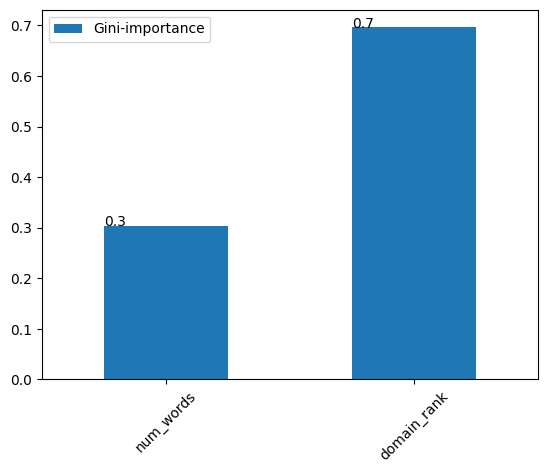

In [162]:
#Gini-importance for Domain rank and word count
feats = {}
for feature, importance in zip(Xr.columns, xgclassifier_r.feature_importances_):
    feats[feature] = importance #add the name/value pair
    feats
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
ax = importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),decimals=2)), (p.get_x(), p.get_height()))

In [163]:
# Test
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier_r.predict_proba(Xr_test)[0][1]))
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier_r.predict_proba(Xr_test)[4][1]))
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier_r.predict_proba(Xr_test)[60][1]))
print('Fakeness classification as per % = ' +  getfakeness(xgclassifier_r.predict_proba(Xr_test)[50][1]))
# you can change index to test more like predict_proba(Xr_test)[index][1], Don't change 1.

Fakeness classification as per % = Pants On Fire
Fakeness classification as per % = True
Fakeness classification as per % = True
Fakeness classification as per % = Pants On Fire


In [164]:
"""
Logistic Regression - 85%
Naive Bayes - 88%
Decision Tree - 90.4%
Random Forest - 93.9%
SVM - 92.4%
KNN 89.22%
XGBoost - 94.2%"""

'\nLogistic Regression - 85%\nNaive Bayes - 88%\nDecision Tree - 90.4%\nRandom Forest - 93.9%\nSVM - 92.4%\nKNN 89.22%\nXGBoost - 94.2%'

In [165]:
"""
75-90% = Mostly True
50-75% = Half True
40-50% = Mostly False
25-40% = False
<25% = Pants On Fire
"""

'\n75-90% = Mostly True\n50-75% = Half True\n40-50% = Mostly False\n25-40% = False\n<25% = Pants On Fire\n'

In [166]:
chunksize = 1000  # You can adjust this value based on your memory capacity and dataset size
iterator = pd.read_csv('kaggle_fake_train.csv', iterator=True, chunksize=chunksize)
df = next(iterator)  # This will read the first chunk of 1000 rows

In [167]:
df.drop('id', axis=1, inplace=True)

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Count')

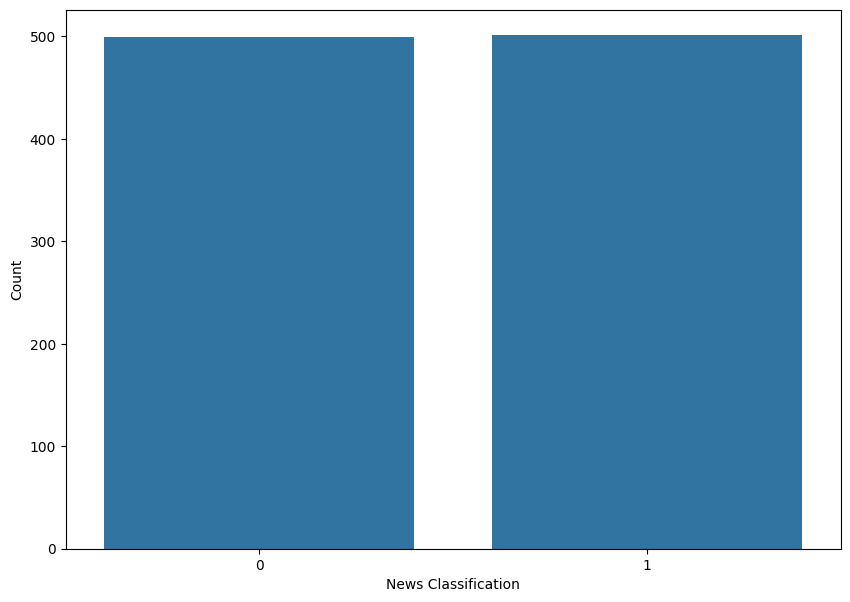

In [169]:

# Visualizing the count of 'fake news' in the dataset
plt.figure(figsize=(10,7))
sns.countplot(x='label', data=df)
plt.xlabel('News Classification')
plt.ylabel('Count')


In [170]:
df.dropna(inplace=True)
print(df.shape)

(870, 4)


In [171]:

news = df.copy()

In [172]:
news.reset_index(inplace=True)

In [173]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [174]:
corpus = []
ps = PorterStemmer()

for i in range(0,news.shape[0]):

  # Cleaning special character from the news-title
  title = re.sub(pattern='[^a-zA-Z]', repl=' ', string=news.title[i])

  # Converting the entire news-title to lower case
  title = title.lower()

  # Tokenizing the news-title by words
  words = title.split()

  # Removing the stopwords
  words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in words]

  # Joining the stemmed words
  title = ' '.join(words)

  # Building a corpus of news-title
  corpus.append(title)

In [175]:
corpus[0:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [176]:

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [177]:
# Extracting dependent variable from the dataset
y = news['label']

In [178]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [179]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [180]:
nb_y_pred = nb_classifier.predict(X_test)


In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))


---- Scores ----
Accuracy score is: 87.36%
Precision score is: 0.87
Recall score is: 0.82


In [182]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)


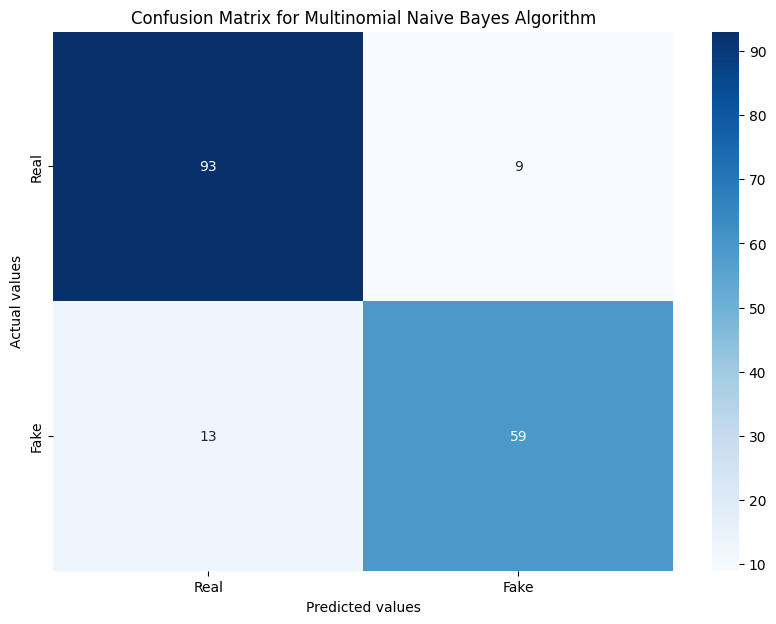

In [183]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [184]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 85.63%
Accuracy score for alpha=0.2 is: 86.21%
Accuracy score for alpha=0.3 is: 86.78%
Accuracy score for alpha=0.4 is: 86.78%
Accuracy score for alpha=0.5 is: 87.36%
Accuracy score for alpha=0.6 is: 87.93%
Accuracy score for alpha=0.7 is: 87.36%
Accuracy score for alpha=0.8 is: 87.36%
Accuracy score for alpha=0.9 is: 87.36%
Accuracy score for alpha=1.0 is: 87.36%
--------------------------------------------
The best accuracy is 87.93% with alpha value as 0.6


In [185]:

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=0)
lr_classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [186]:
lr_y_pred = lr_classifier.predict(X_test)


In [187]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 94.25%
Precision score is: 0.88
Recall score is: 1.0


In [188]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)

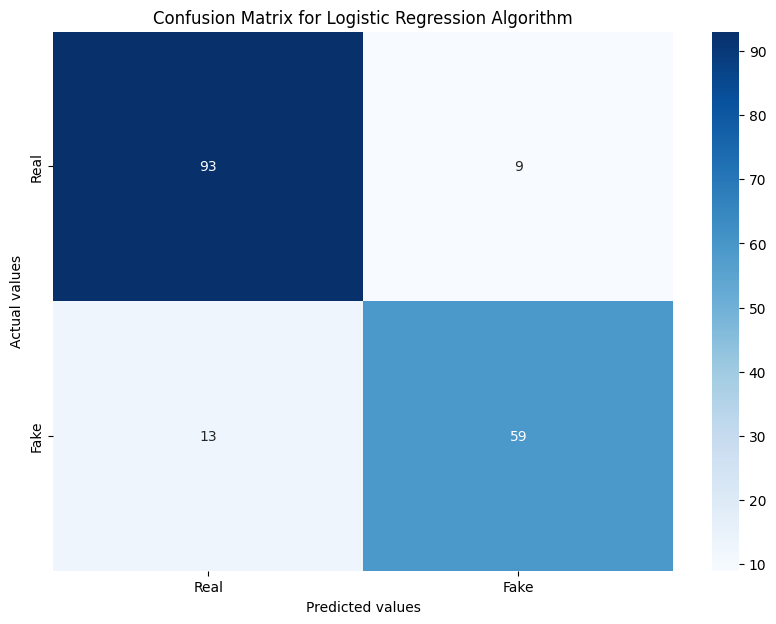

In [189]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [190]:

best_accuracy = 0.0
c_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = LogisticRegression(C=i, random_state=0)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for C={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    c_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with C value as {}'.format(round(best_accuracy*100, 2), round(c_val,1)))

Accuracy score for C=0.1 is: 94.25%
Accuracy score for C=0.2 is: 94.25%
Accuracy score for C=0.3 is: 94.25%
Accuracy score for C=0.4 is: 94.25%
Accuracy score for C=0.5 is: 94.25%
Accuracy score for C=0.6 is: 94.25%
Accuracy score for C=0.7 is: 94.25%
Accuracy score for C=0.8 is: 94.25%
Accuracy score for C=0.9 is: 94.25%
Accuracy score for C=1.0 is: 94.25%
--------------------------------------------
The best accuracy is 94.25% with C value as 0.1


In [191]:
classifier = LogisticRegression(C=0.8, random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.8, random_state=0)

In [192]:
def fake_news(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)

  temp = cv.transform([final_news]).toarray()
  return classifier.predict(temp)

In [193]:
iterator = pd.read_csv('kaggle_fake_train.csv', iterator=True, chunksize=chunksize)
df_test = next(iterator)  # Process chunks one at a time


In [194]:
news_title = df_test['title']

In [195]:

# For generating random integer
from random import randint

In [198]:
row = randint(0,news_title.shape[0]-1)
sample_news = news_title[row]
-+
print('News: {}'.format(sample_news))
if fake_news(sample_news):
  print('Prediction: This is a FAKE news!')
else:
  print('Prediction: This is a REAL news.')

News: Warriors, Resilient at Home, Cruise Against the Cavaliers - The New York Times
Prediction: This is a REAL news.
